## Methods for modelling time series with seasonality-
1. Moving average method
2. Triple exponential smoothing using Winter's method

In [4]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Moving average methods

In moving average method we find seasonal factors by dividing all the data by sample mean to get season factors. Thereafter, seasonal factors for each period in a season is averageed out and every observation value is dividing by its seasonal factor to get seasonalized data and then a linear model such as linear regression or holt's method is fitted and values are forecasted. Forecasted value are deseasonized to reseasonalize them seasona factor is multiplied to get seasonalized forecast.

Disadvantage- we'll have to update seasonal factor values everytime a new observation value is introduced so this method is not that good.

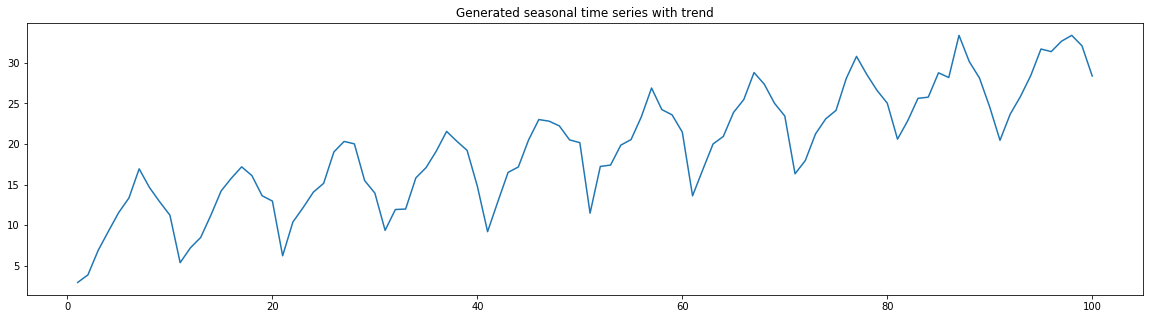

In [195]:
##Generating data
x=list(np.linspace(1,100,100))
y_random=list(.9*np.random.randn(100))
y_season=[1.,2.,3.,4.,5.,6.,7.,6.,5.,4.]
y_season=y_season*10
y_trend=.8+.2*np.array(x)
y=list(2*np.array(y_season)+np.array(y_random)+y_trend)
plt.figure(figsize=(20,5))
plt.title("Generated seasonal time series with trend")
plt.plot(x,y)
plt.show()

In [97]:
len_of_season=10 #No. of periods after which values repeated
Y=np.array(y)
sample_mean=np.mean(Y)
Y_factor=Y/sample_mean
Seasonal_factor=[]
for i in range(10):
    j=i
    s=0
    while(j<len(y)):
        s+=Y_factor[j]
        j+=len_of_season
    s=s/len_of_season
    Seasonal_factor.append(s)

In [98]:
seas=np.array(Seasonal_factor*10)
seas

array([0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992506,
       1.16306452, 1.2972557 , 1.2103651 , 1.1146438 , 1.01372722,
       0.6020716 , 0.71755113, 0.86206493, 0.96933094, 1.04992

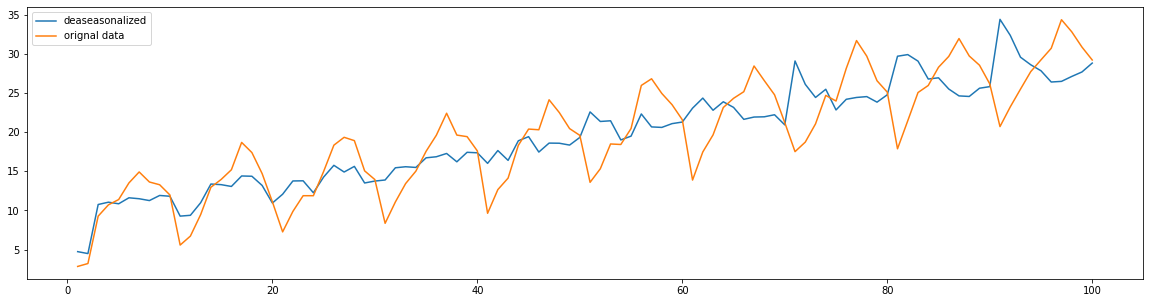

In [99]:
#De seasonalizing data 
Y_deseas=Y/seas
plt.figure(figsize=(20,5))
plt.plot(x,Y_deseas,label='deaseasonalized')
plt.plot(x,y,label='orignal data')
plt.legend()
plt.show()

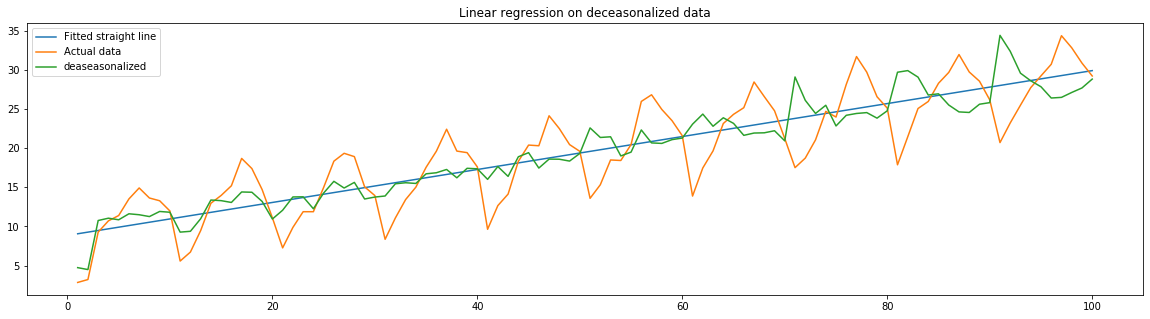

In [102]:
#Fitting simple linear regression in de seasonalized data
X=np.array(x).reshape(len(x),1)
Y1=np.array(y).reshape(len(y),1)
ones=np.ones(shape=(X.shape[0],1))
theta=np.random.rand(2,1)
X=np.hstack((ones,X))

def linear_regression(X,Y):
    theta_opt=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta_opt

theta_opt=linear_regression(X,Y)
h=X.dot(theta_opt)
plt.figure(figsize=(20,5))
plt.plot(X[:,1],h,label='Fitted straight line')
plt.plot(X[:,1],Y,label='Actual data')
plt.plot(x,Y_deseas,label='deaseasonalized')
plt.legend()
plt.title(label="Linear regression on deceasonalized data")
plt.show()

In [109]:
#Predicting values for next 10 values 
x_test=np.arange(101,111).reshape(10,1)
on=np.ones((10,1))
X_test=np.hstack((on,x_test))

In [114]:
y_predicted=X_test.dot(theta_opt)

In [117]:
#Re-seasonalizing data using seasonal_factors
y_predicted_reseas=y_predicted*seas[:10]

In [130]:
#Actual test data
y_test=list(2*np.array(y_season[:10])+np.array(y_random)[:10]+.8+.2*np.array([101,102,103,104,105,106,107,108,109,110]))

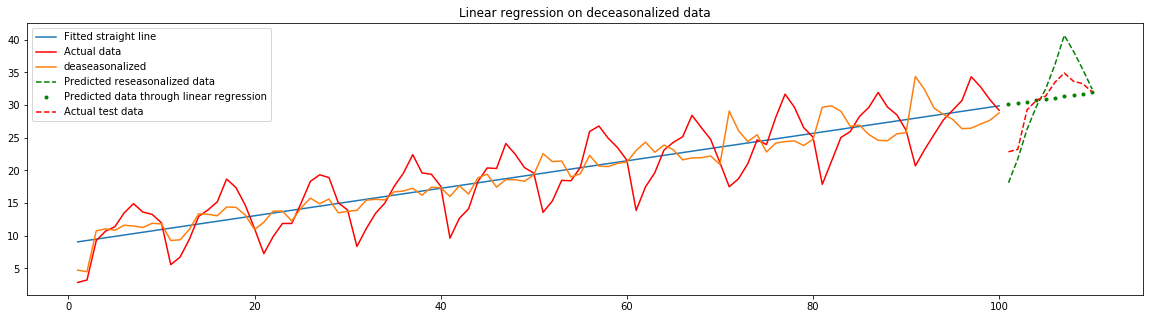

In [141]:
plt.figure(figsize=(20,5))
plt.plot(X[:,1],h,label='Fitted straight line')
plt.plot(X[:,1],Y,'r',label='Actual data')
plt.plot(x,Y_deseas,label='deaseasonalized')
plt.plot(X_test[:,1],y_predicted_reseas,'g--',label='Predicted reseasonalized data')
plt.plot(X_test[:,1],y_predicted,'g.',label='Predicted data through linear regression')
plt.plot(X_test[:,1],y_test,'r--',label='Actual test data')
plt.legend()
plt.title(label="Linear regression on deceasonalized data")
plt.show()

### Triple Exponential smoothing using Winter's method

This method adress the problem of updating seasonal factors when a new observation is introduced. Here are the equations:
$$S_t=\alpha {D_t}/{c_{t-N}}+(1-\alpha)(S_{t-1}+G_{t-1})  $$
$$G_t=\beta ({S_{t}-S_{t-1}})+(1-\beta)(G_{t-1})  $$
$$c_t=\gamma {D_t}/{S_t}+(1-\gamma)c_{t-N}  $$

#### Initializing the data:

First atleast two seasons worth of data must be available for initialization as per orignal approach.

In [196]:
y_initial=y[:20]
y=y[20:]
x_initial=x[:20]
x=x[20:]

In [189]:
N=10
V=[]
V.append(np.mean(y_initial[:N]))
V.append(np.mean(y_initial[N:2*N]))
G_o=(V_2-V_1)/N
S_o=V_2+G_o*(N-1)/2

In [190]:
c=[0.]*10
for j in range(N):
    for i in range(2):
        c[j]+=y[j+N*i]/(V[i]-(((N+1)/2)-j)*G_0)
    c[j]/=2

In [ ]:
#Alternate initial estimates


Initial estimates are stored in variables in $G_o$, $S_o$ and $c$.
Now we can forecast using the winter's method

In [197]:
#Defining a function for calculating and plotitng time series
def winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.1,beta=.1,gamma=.1):
    # All the predictions are being done as one step ahead predictions.
    h_final=[]
    S_t1=S_o
    G_t1=G_o
    j=0
    #h_final.append(((S_o+G_o)/c[:-1]))
    for i in range(len(y)):
        S_t=(alpha*y[i]/c[i%N])+(1-alpha)*(S_t1+G_t1)
        G_t=beta*(S_t-S_t1)+(1-beta)*G_t1
        c[i%N]=gamma*(y[i]/S_t)+(1-gamma)*c[i%N]
        S_t1=S_t
        G_t1=G_t
        
        #Forecast for one step ahead
        h_final.append((S_t+G_t)/c[i%N])
    plt.figure(figsize=(20,5))
    plt.plot(x,y,label='Actual data')
    plt.plot(x,h_final,label='Forecast')
    plt.show()
    

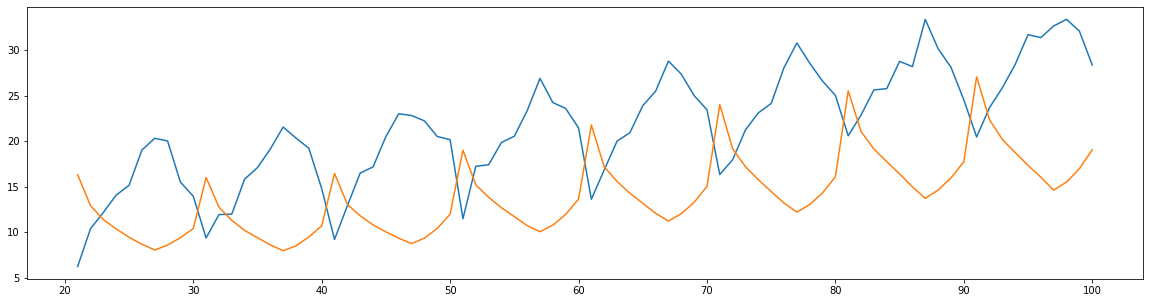

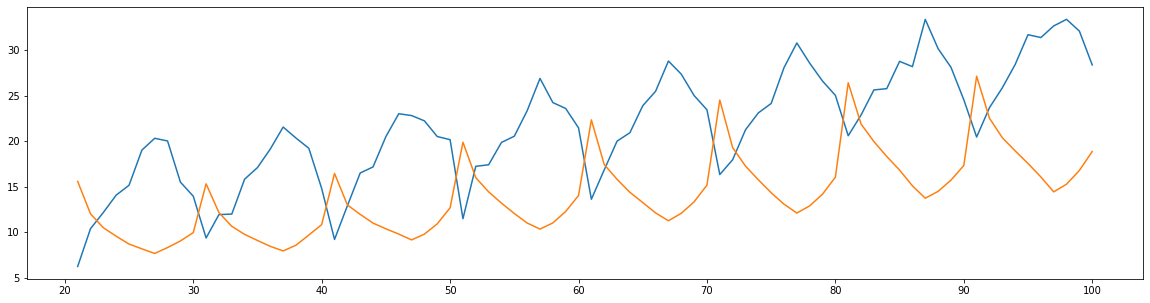

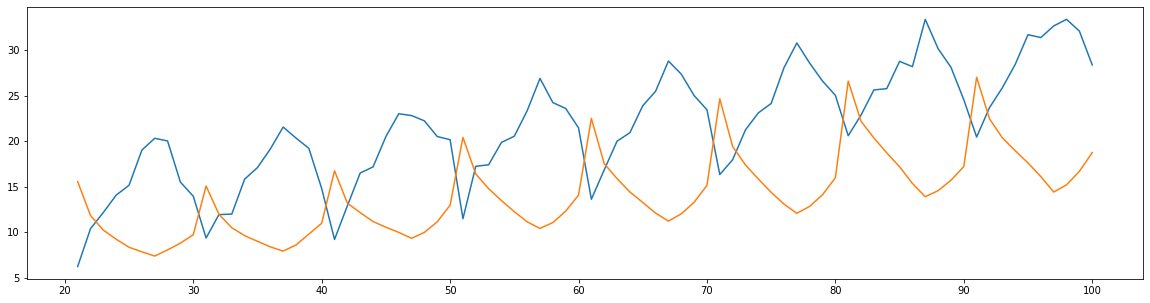

In [199]:
#Trying winter's method for different values of alpha,beta,gamma
winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.1,beta=.1,gamma=.1)
winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.2,beta=.1,gamma=.1)
winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.2,beta=.2,gamma=.1)
#winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.1,beta=.2,gamma=.1)
#winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.1,beta=.2,gamma=.2)
#winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.2,beta=.1,gamma=.2)
#winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.1,beta=.1,gamma=.2)
#winter_method(x_initial,y_initial,x,y,S_o,G_o,c,N,alpha=.2,beta=.2,gamma=.2)